In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import math

In [79]:
dados=pd.read_csv('/content/vendas_ecommerce.csv')

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


Não achamos valores nulos

In [82]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


Analisando quais categorias de produto tem mais vendas

In [83]:
produtos=dados['categoria_produto'].value_counts().reset_index()
produtos

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


<ipython-input-84-f8189ef95daf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


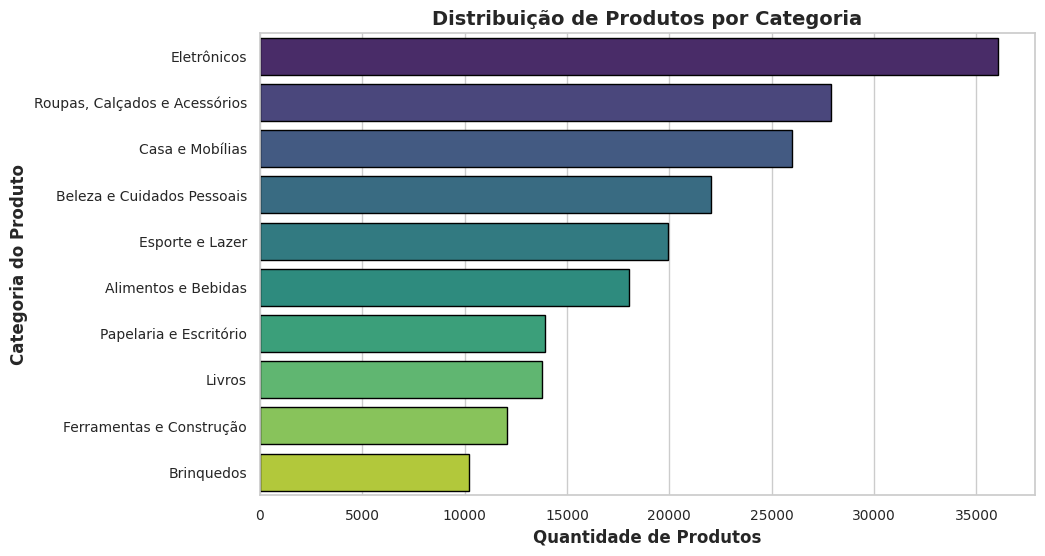

In [84]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='count',
    y='categoria_produto',
    data=produtos,
    palette='viridis',
    edgecolor='black'
)
ax.set_xlabel("Quantidade de Produtos", fontsize=12, fontweight='bold')
ax.set_ylabel("Categoria do Produto", fontsize=12, fontweight='bold')
ax.set_title("Distribuição de Produtos por Categoria", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**A categoria que mais possui vendas é a de eletrônicos, seguida por roupas,calçados e acessórios e logo após casa e mobílias**

In [85]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


In [86]:
sorted(dados['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

Criando as categorias

In [87]:
dados['avaliacao indicador']=pd.Categorical(
    dados['avaliacao'], categories=[1,2,3,4,5], ordered=True

)

referenciando os valores as palavras

In [88]:
avaliacao_labels={1:'Péssimo',2:'Ruim',3:'Regular',4:'Bom',5:'Ótimo'}

dados['avaliacao indicador']=dados['avaliacao indicador'].map(avaliacao_labels)

In [89]:
dados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [90]:
df_unico=dados[['avaliacao','avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


Analisando a quantidade de produtos vendidos

In [91]:
print("Vendemos de ",dados['quantidade'].min()," a ",dados['quantidade'].max()," unidades de produtos")

Vendemos de  1  a  10  unidades de produtos


In [92]:
print("Temos produtos com valores a partir de ",dados['total_compra'].min(),'reais até o valor de ',dados['total_compra'].max(),'reais')


Temos produtos com valores a partir de  5.05 reais até o valor de  20744.7 reais


Analisando quais foram as 10 compras mais caras na loja

In [93]:
dados.sort_values('total_compra',ascending=False).head(10)

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
108742,8c971cc6-964e-468d-86f8-1e6955887bd1,Feminino,28,Sudeste,Eletrônicos,2074.47,10,20744.7,11,1,Péssimo
114561,dc3c4162-5772-480e-b7fa-0ccc41d78a40,Feminino,29,Sudeste,Eletrônicos,2058.77,10,20587.7,6,5,Ótimo
17790,dbf2429a-3252-42df-ad4e-a11339afceb8,Feminino,33,Sudeste,Eletrônicos,2058.18,10,20581.8,4,5,Ótimo
134287,2c3853dc-b9dc-400a-bd70-ff2521fe4d8a,Feminino,35,Sul,Eletrônicos,2057.76,10,20577.6,6,2,Ruim
88073,5f125e88-f01c-4499-9a25-c4910bc76dee,Masculino,39,Nordeste,Eletrônicos,2037.44,10,20374.4,7,2,Ruim
157284,c54c472b-03fc-44bc-baf4-5cab1058da40,Feminino,31,Sudeste,Eletrônicos,2032.69,10,20326.9,8,5,Ótimo
154275,4de22f75-824b-49a2-a758-c9e98d072c1e,Masculino,53,Nordeste,Eletrônicos,2021.43,10,20214.3,9,1,Péssimo
25798,cbefed8b-db8a-4c26-b7fa-0133cc82dd8d,Masculino,50,Nordeste,Eletrônicos,2012.22,10,20122.2,5,5,Ótimo
124404,ddda23ab-27d2-440d-829a-824127250ea2,Feminino,24,Sudeste,Eletrônicos,2011.10,10,20111.0,12,1,Péssimo
24720,54a9c744-4dfe-4943-9166-2448c619e787,Masculino,33,Nordeste,Eletrônicos,2007.45,10,20074.5,7,5,Ótimo


**Identificando o perfil do público da loja**

Acompanhando as avaliações dos clientes

In [94]:
frequencia_avaliacoes = (
    dados.groupby('avaliacao indicador', observed=False)
    .size()
    .reset_index(name='frequencia_absoluta')
    .sort_values(by='avaliacao indicador', ascending=False)
)
frequencia_avaliacoes

,avaliacao indicador,frequencia_absoluta
4,Ótimo,66076
3,Bom,40980
2,Regular,32282
1,Ruim,28239
0,Péssimo,32423


In [95]:
frequencia_avaliacoes['frequencia relativa']=round((frequencia_avaliacoes['frequencia_absoluta']/
                                                   frequencia_avaliacoes['frequencia_absoluta'].sum())*100,1)
frequencia_avaliacoes

,avaliacao indicador,frequencia_absoluta,frequencia relativa
4,Ótimo,66076,33.0
3,Bom,40980,20.5
2,Regular,32282,16.1
1,Ruim,28239,14.1
0,Péssimo,32423,16.2


In [96]:
frequencia_avaliacoes.columns=['Avaliação','Quantidade','Porcentagem(%)']

Criando o gráfico

<ipython-input-97-41e973015547>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


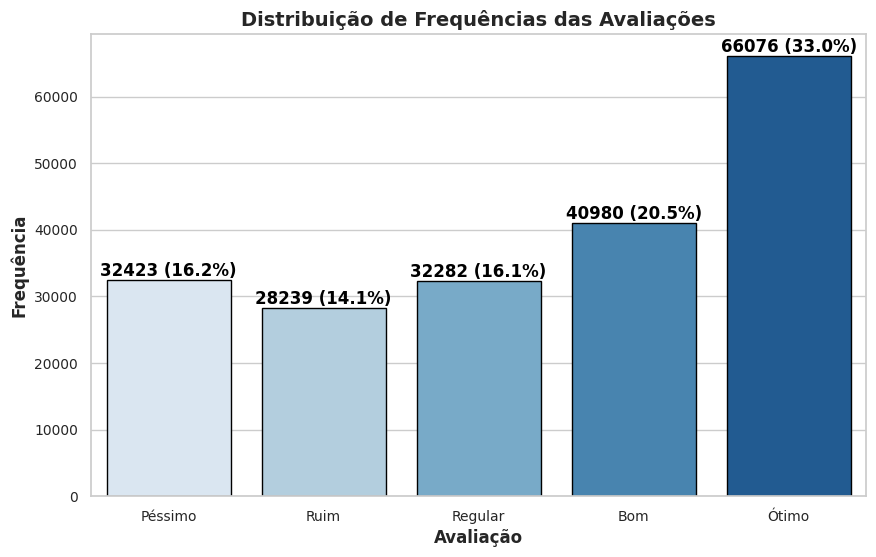

In [97]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=frequencia_avaliacoes,
    x='Avaliação',
    y='Quantidade',
    palette='Blues',
    edgecolor='black'
)

for index, row in frequencia_avaliacoes.iterrows():
    ax.text(
        index,
        row['Quantidade'] + 0.5,
        f"{row['Quantidade']} ({row['Porcentagem(%)']:.1f}%)",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

ax.set_xlabel("Avaliação", fontsize=12, fontweight='bold')
ax.set_ylabel("Frequência", fontsize=12, fontweight='bold')
ax.set_title("Distribuição de Frequências das Avaliações", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)

plt.yticks(fontsize=10)
plt.show()

**Notamos que a categoria péssimo ficou acima das categorias 'Ruim' e 'Regular' por 2,1% e 0,1% respectivamente**

Analisando as avaliações dos clientes de cada regiao do Brasil

In [98]:
tab_avaliacao_reg=pd.crosstab(dados['avaliacao indicador'],dados['regiao_cliente'])
tab_avaliacao_reg

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,5005,7880,2757,9838,6943
Ruim,4473,6809,2545,8810,5602
Regular,3587,5701,3811,13454,5729
Bom,7378,11834,3058,11845,6865
Ótimo,11124,17343,5490,20656,11463


In [99]:
tab_avaliacoes_reg_rel=pd.crosstab(dados['avaliacao indicador'],dados['regiao_cliente'],normalize='columns')*100
tab_avaliacoes_reg_rel=round(tab_avaliacoes_reg_rel,1)


tab_avaliacoes_reg_rel

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
avaliacao indicador,,,,,
Péssimo,15.9,15.9,15.6,15.2,19.0
Ruim,14.2,13.7,14.4,13.6,15.3
Regular,11.4,11.5,21.6,20.8,15.7
Bom,23.4,23.9,17.3,18.3,18.8
Ótimo,35.2,35.0,31.1,32.0,31.3


Vamos analisar quais regiões tem mais avaliações positivas

In [100]:
tab_avaliacoes_filtro=tab_avaliacoes_reg_rel.loc[['Ótimo','Bom']]
resultado=tab_avaliacoes_filtro.sum().sort_values(ascending=False)
resultado

,0
regiao_cliente,
Nordeste,58.9
Centro-Oeste,58.6
Sudeste,50.3
Sul,50.1
Norte,48.4


**As regiões Centro-Oeste e Nordeste tem as duas melhores avaliações com 58.6% e 58.9% respectivamente**

In [101]:
tab_avaliacoes_filtro_negativa=tab_avaliacoes_reg_rel.loc[['Ruim','Péssimo']]
resultado_negativa=tab_avaliacoes_filtro_negativa.sum().sort_values(ascending=False)
resultado_negativa

,0
regiao_cliente,
Sul,34.3
Centro-Oeste,30.1
Norte,30.0
Nordeste,29.6
Sudeste,28.8


**As regiões Sul e Centro-Oeste tem as piores avaliações com 34.3% e 30.1% respectivamente**

Vamos entender como o ticket médio varia entre o gênero e a sua região de residência

In [102]:
ticket_medio=round(pd.crosstab(dados['sexo_biologico'],dados['regiao_cliente'],values=dados['total_compra'],aggfunc='mean'),2)
ticket_medio

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
sexo_biologico,,,,,
Feminino,1887.12,1861.09,1828.61,2160.82,2176.44
Masculino,2025.24,2005.31,1830.54,1881.08,1871.38


Observa-se que as pessoas do gênero masculino nas regiões Centro-Oeste e Nordeste, com uma diferença de aproximadamente **150,00** reais.  
Porém, as pessoas do gênero feminino gastam mais do que as pessoas do gênero masculino na região Sul e Sudeste, com uma diferença de aproximadamente **300,00** reais.


Vamos ver o volume de compras por gênero

In [119]:
compras_por_genero_regiao = dados.groupby(['sexo_biologico', 'regiao_cliente'])['id_compra'].count().unstack()
compras_por_genero_regiao

regiao_cliente,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
sexo_biologico,,,,,
Feminino,12400,20768,6261,39594,25182
Masculino,19167,28799,11400,25009,11420


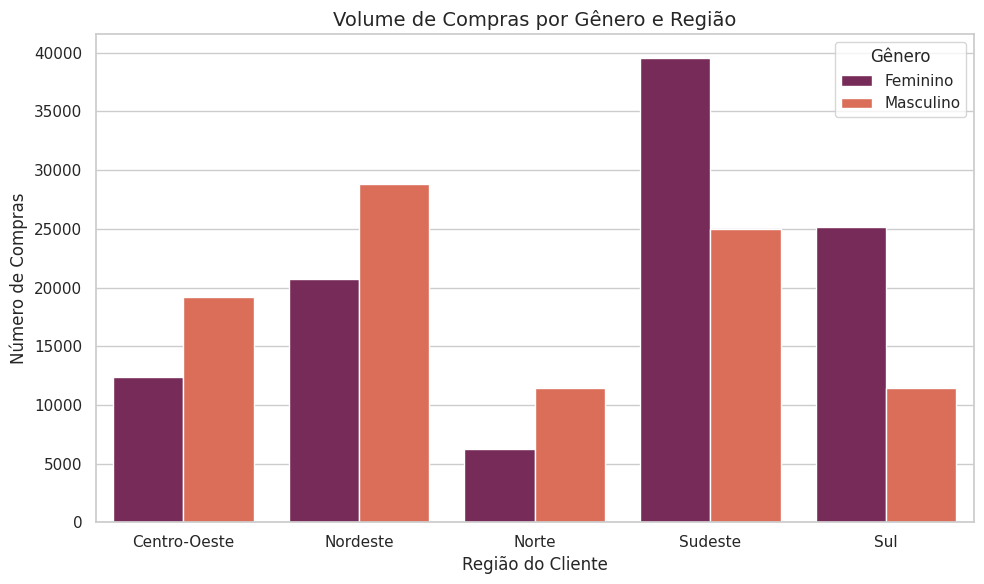

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

compras_por_genero_regiao = dados.groupby(['sexo_biologico', 'regiao_cliente'])['id_compra'].count().reset_index()
compras_por_genero_regiao.rename(columns={'id_compra': 'quantidade_compras'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=compras_por_genero_regiao,
    x='regiao_cliente',
    y='quantidade_compras',
    hue='sexo_biologico',
    palette="rocket"
)

plt.title('Volume de Compras por Gênero e Região', fontsize=14)
plt.xlabel('Região do Cliente')
plt.ylabel('Número de Compras')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()


**O volume de compras dos homens é maior nas regiões: Centro-Oeste, Nordeste e Norte. Já as mulheres tem um volume maior nas regiões Sudeste e sul**

vamos ver as categorias preferidas por gênero

In [124]:
categorias_preferidas = dados.groupby(['sexo_biologico', 'categoria_produto'])['id_compra'].count().unstack().fillna(0)
categorias_preferidas

categoria_produto,Alimentos e Bebidas,Beleza e Cuidados Pessoais,Brinquedos,Casa e Mobílias,Eletrônicos,Esporte e Lazer,Ferramentas e Construção,Livros,Papelaria e Escritório,"Roupas, Calçados e Acessórios"
sexo_biologico,,,,,,,,,,
Feminino,9383,11471,5328,13613,18819,10397,6265,7149,7247,14533
Masculino,8639,10555,4904,12402,17241,9542,5798,6641,6689,13384


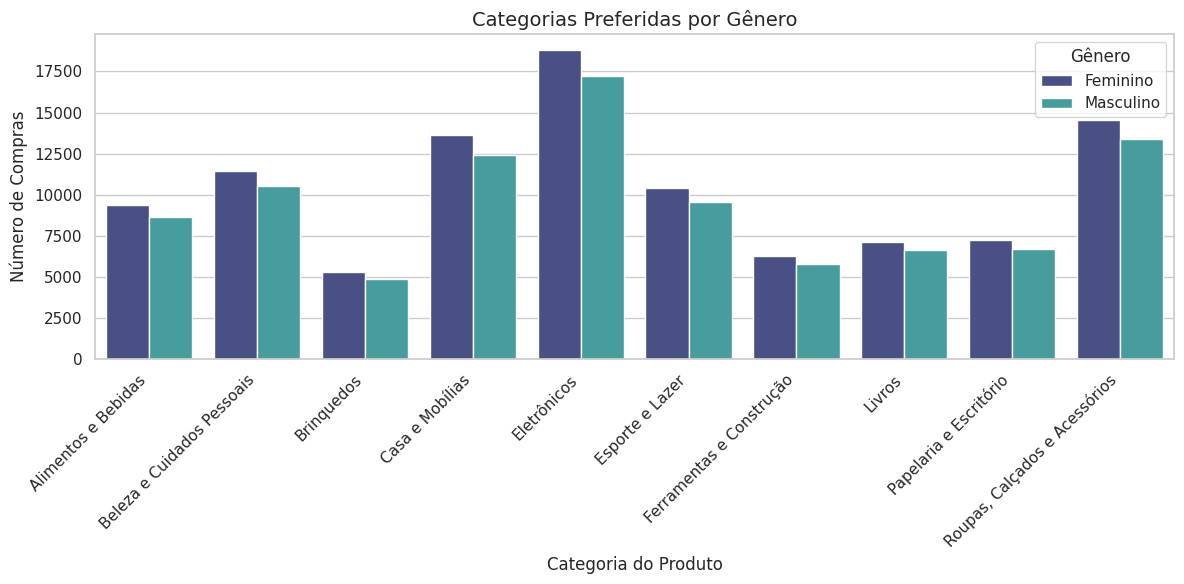

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

categorias_preferidas = dados.groupby(['sexo_biologico', 'categoria_produto'])['id_compra'].count().reset_index()
categorias_preferidas.rename(columns={'id_compra': 'quantidade_compras'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=categorias_preferidas,
    x='categoria_produto',
    y='quantidade_compras',
    hue='sexo_biologico',
    palette="mako"
)

plt.title('Categorias Preferidas por Gênero', fontsize=14)
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()


**Em todas as categorias as mulheres tem um volume maior de compras que os homens**

Analisando as categorias de produtos que levam mais tempo para serem entregues para serem melhoradas

In [103]:
media_entrega=dados.tempo_entrega.mean()
media_entrega

np.float64(10.043535)

Calculando a média por categorias de produto

In [104]:
media_entrega_categoria=dados.groupby('categoria_produto')['tempo_entrega'].mean().reset_index().round(1)
media_entrega_categoria

,categoria_produto,tempo_entrega
0,Alimentos e Bebidas,7.7
1,Beleza e Cuidados Pessoais,8.9
2,Brinquedos,10.1
3,Casa e Mobílias,14.4
4,Eletrônicos,7.2
5,Esporte e Lazer,10.7
6,Ferramentas e Construção,13.6
7,Livros,9.5
8,Papelaria e Escritório,12.0
9,"Roupas, Calçados e Acessórios",9.2


In [105]:
media_entrega_categoria.columns=['categoria_produto','media_tempo']

media_entrega_categoria=media_entrega_categoria.sort_values(by='media_tempo',ascending=False)
media_entrega_categoria.drop(media_entrega_categoria[media_entrega_categoria['categoria_produto'] == 'Casa e Mobíli'].index, inplace=True)
media_entrega_categoria

,categoria_produto,media_tempo
3,Casa e Mobílias,14.4
6,Ferramentas e Construção,13.6
8,Papelaria e Escritório,12.0
5,Esporte e Lazer,10.7
2,Brinquedos,10.1
7,Livros,9.5
9,"Roupas, Calçados e Acessórios",9.2
1,Beleza e Cuidados Pessoais,8.9
0,Alimentos e Bebidas,7.7
4,Eletrônicos,7.2


<ipython-input-106-66084a56f14e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


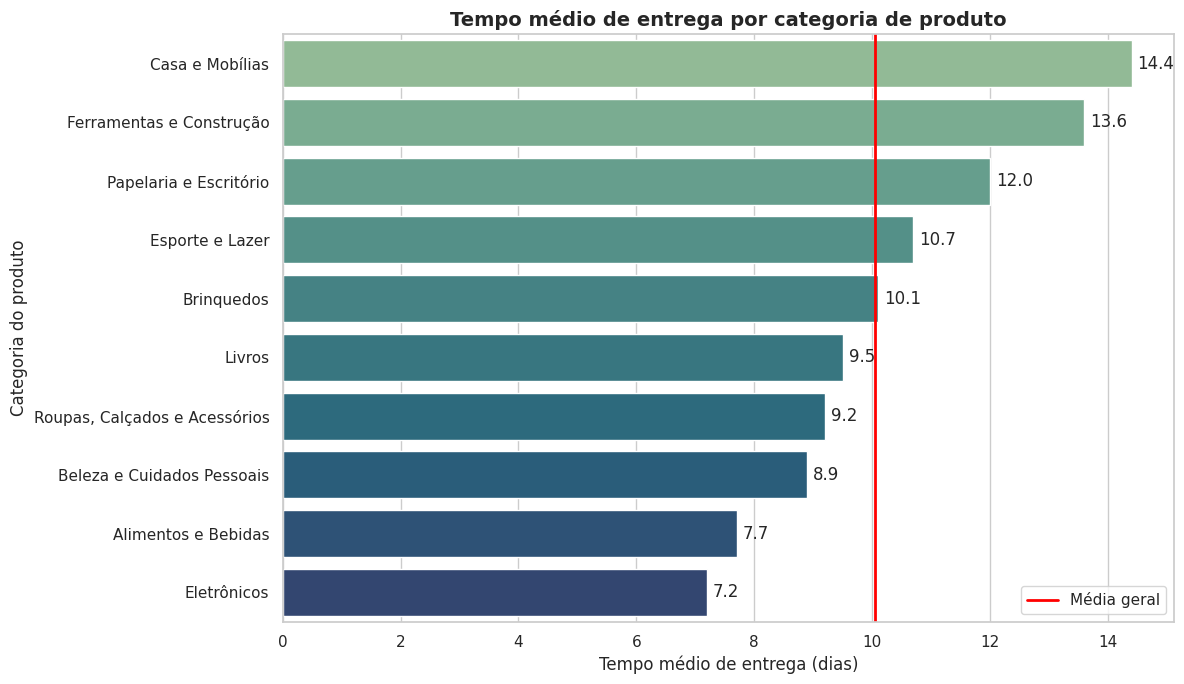

In [106]:
sns.set(style='whitegrid')
media_entrega_categoria_sorted = media_entrega_categoria.sort_values('media_tempo', ascending=False)
plt.figure(figsize=(12, 7))

sns.barplot(
    data=media_entrega_categoria_sorted,
    x='media_tempo',
    y='categoria_produto',
    palette="crest"
)

plt.axvline(media_entrega, color='red',  linewidth=2, label='Média geral')

for i, (tempo, categoria) in enumerate(zip(media_entrega_categoria_sorted['media_tempo'], media_entrega_categoria_sorted['categoria_produto'])):
    plt.text(tempo + 0.1, i, f"{tempo:.1f}", va='center')

plt.xlabel('Tempo médio de entrega (dias)', fontsize=12)
plt.ylabel('Categoria do produto', fontsize=12)
plt.title('Tempo médio de entrega por categoria de produto', fontsize=14, weight='bold')

plt.legend()
plt.tight_layout()
plt.show()

Analisamos que produtos como: Casa e Mobílias, Ferramentas e Construção, Papelaria e Escritório, Esport e Lazer e Brinquedos estão acima da média do tempo de entrega, logo isso pode afetar na sua quantidade de vendas dos produtos

Vamos analisar as vendas de eletrônicos na região Nordeste. A equipe deseja entender melhor a distribuição dos valores de vendas para ajustar sua estratégia de preços e campanhas

In [107]:
eletronicos_nordeste=dados[(dados['regiao_cliente']=='Nordeste') & (dados['categoria_produto']=='Eletrônicos')]
eletronicos_nordeste=eletronicos_nordeste.sort_values('total_compra')
eletronicos_nordeste.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
78891,b398ddb6-2790-443a-9d32-15ff5778ca19,Feminino,25,Nordeste,Eletrônicos,25.35,1,25.35,9,3,Regular
36398,76f5e991-cf96-4b4c-b6f5-4f84e763fdb9,Feminino,26,Nordeste,Eletrônicos,26.34,1,26.34,9,3,Regular
71461,689e13d1-85f7-44ac-997f-e46ed8c1fdde,Feminino,34,Nordeste,Eletrônicos,29.85,1,29.85,7,5,Ótimo
112356,b2878a8d-e3cc-40af-a46c-d9ae1b8e3aa6,Feminino,27,Nordeste,Eletrônicos,30.09,1,30.09,4,5,Ótimo
29317,23e748d7-2f72-4c3c-97ce-ac9fc5624ea8,Feminino,39,Nordeste,Eletrônicos,32.92,1,32.92,6,2,Ruim


In [108]:
eletronicos_nordeste.total_compra.median()

2989.62

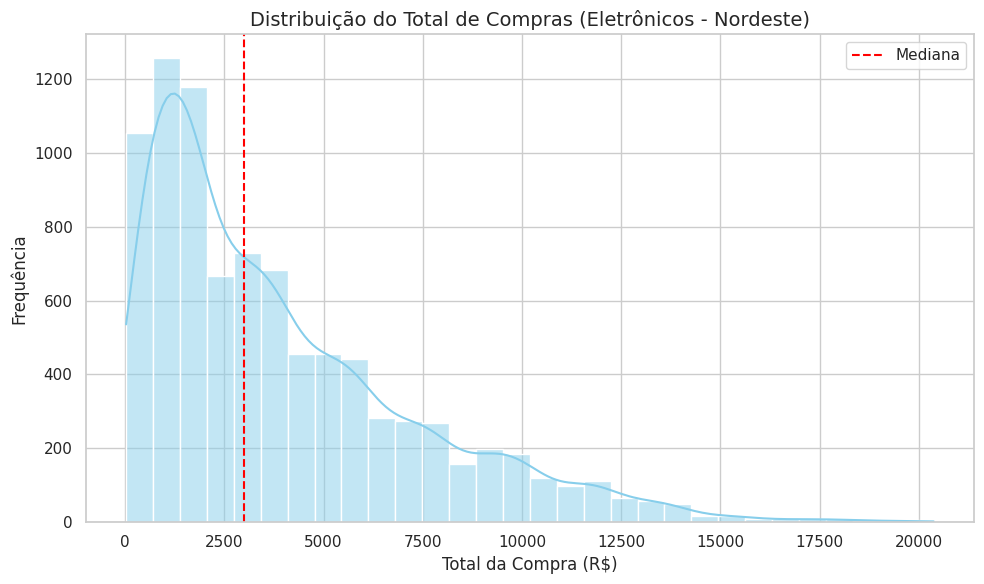

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(eletronicos_nordeste['total_compra'], bins=30, kde=True, color='skyblue')
plt.axvline(eletronicos_nordeste['total_compra'].median(), color='red', linestyle='--', label='Mediana')

plt.title('Distribuição do Total de Compras (Eletrônicos - Nordeste)', fontsize=14)
plt.xlabel('Total da Compra (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

A mediana indica que metade dos cliente gastam até **3.137,00 reais** em produtos eletrônicos

Analisando a quantidade de livros mais compradas pelos clientes, para entender a oferta e demanda

In [110]:
dados['regiao_cliente'].value_counts()

,count
regiao_cliente,
Sudeste,64603
Nordeste,49567
Sul,36602
Centro-Oeste,31567
Norte,17661


In [111]:
dados_filtrados=dados[dados['categoria_produto']=='Livros']
dados_filtrados.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
11,b0494b41-df5b-488f-b305-43dda2916737,Feminino,24,Centro-Oeste,Livros,300.07,2,600.14,10,4,Bom
60,7c1da24d-871d-4a84-a21b-b25ad422676a,Masculino,44,Sudeste,Livros,177.15,2,354.30,11,1,Péssimo
61,7dd0a745-207a-41bc-a3bf-c5ff6e1cd274,Masculino,47,Sudeste,Livros,354.72,1,354.72,9,3,Regular
83,fa44d7e6-e17b-4fef-8326-e9b3035699e5,Masculino,35,Sul,Livros,116.94,3,350.82,16,3,Regular
92,399a3765-c43e-434f-b9eb-8cb7eb4a21ff,Feminino,26,Sul,Livros,129.11,4,516.44,10,4,Bom


In [112]:
moda=dados_filtrados.quantidade.mode()
moda

,quantidade
0,2
1,4


Descobrimos que a quantidade de livro que os clientes mais compram na loja são de **4 livros**  por compra

Vamos investigar as avaliações e sua relação com o tempo de entrega

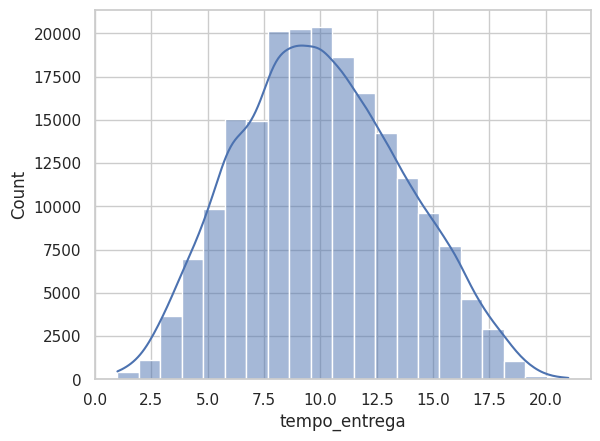

In [113]:
sns.histplot(bins=21,data=dados,x='tempo_entrega',kde=True,kde_kws={'bw_adjust':2})
plt.show()

Pelo gráfico nota-se que ele é simetrico, logo a média,mediana e moda tem valores semelhantes

In [114]:
resumo_tempo_entrega={
    'media':dados['tempo_entrega'].mean(),
    'mediana':dados['tempo_entrega'].median(),
    'moda':dados['tempo_entrega'].mode()[0]
}
resumo_tempo_entrega



{'media': np.float64(10.043535), 'mediana': 10.0, 'moda': np.int64(10)}

Confirmando que os valores são praticamente iguais

In [115]:
dados_nota_5=dados[dados['avaliacao']==5]
dados_nota_5.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo
5,bbbaecc2-2d97-4c02-a69c-77ccfb2c8a26,Masculino,29,Nordeste,Beleza e Cuidados Pessoais,131.20,1,131.20,13,5,Ótimo
6,923d6915-1488-485b-9398-4fbcf7146496,Masculino,44,Centro-Oeste,Casa e Mobílias,909.83,2,1819.66,14,5,Ótimo


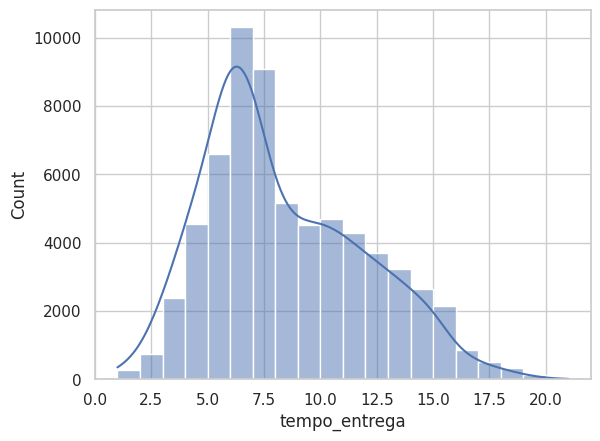

In [42]:
sns.histplot(bins=20,data=dados_nota_5,x='tempo_entrega',kde=True,kde_kws={'bw_adjust':2})
plt.show()

Percebemos no gráfico uma assimetria para a esquerda

In [43]:
resumo_tempo_entrega={
    'media':dados_nota_5['tempo_entrega'].mean(),
    'mediana':dados_nota_5['tempo_entrega'].median(),
    'moda':dados_nota_5['tempo_entrega'].mode()[0]
}
resumo_tempo_entrega

{'media': np.float64(8.290680428597373), 'mediana': 7.0, 'moda': np.int64(6)}

Vamos analisar agora a remuneração dos colaboradores.
Essas informações serão usadas para ajustar benefícios,analisr disparidades salariais e planejamento de retenção de talentos

In [44]:
 colaboradores=pd.read_csv('/content/colaboradores.csv')
 colaboradores.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55


In [45]:
n=len(colaboradores)
n

11090

In [46]:
k=1 + (10/3)* math.log10(n)
k=int(k)
k

14

Criando as faixas salariais

In [47]:
faixas=colaboradores.copy()

In [48]:
faixas['faixa_salarial']=pd.cut(faixas['remuneracao'],bins=int(k),include_lowest=True)
faixas

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,faixa_salarial
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79,"(29929.98, 32084.55]"
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07,"(25620.84, 27775.41]"
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61,"(25620.84, 27775.41]"
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60,"(25620.84, 27775.41]"
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55,"(29929.98, 32084.55]"
...,...,...,...,...,...,...,...,...
11085,REP011086,Nicolas Mendes,Masculino,40,Repositor(a),Bom,3340.72,"(1890.405, 4075.14]"
11086,REP011087,Maria Luísa Câmara,Feminino,48,Repositor(a),Insuficiente,3330.98,"(1890.405, 4075.14]"
11087,REP011088,Allana da Mota,Feminino,28,Repositor(a),Excelente,3382.03,"(1890.405, 4075.14]"
11088,REP011089,Bruno Rezende,Masculino,36,Repositor(a),Bom,3088.46,"(1890.405, 4075.14]"


Criando tabela de frequência

In [49]:
tabela_frequencia=faixas.groupby('faixa_salarial',observed=False).size().reset_index(name='frequencia')

tabela_frequencia['porcentagem']=(tabela_frequencia['frequencia']/len(colaboradores))*100

tabela_frequencia

,faixa_salarial,frequencia,porcentagem
0,"(1890.405, 4075.14]",5828,52.551849
1,"(4075.14, 6229.71]",3662,33.020739
2,"(6229.71, 8384.28]",1112,10.027051
3,"(8384.28, 10538.85]",288,2.596934
4,"(10538.85, 12693.42]",131,1.181244
5,"(12693.42, 14847.99]",20,0.180343
6,"(14847.99, 17002.56]",15,0.135257
7,"(17002.56, 19157.13]",13,0.117223
8,"(19157.13, 21311.7]",11,0.099188
9,"(21311.7, 23466.27]",4,0.036069


Notamos que  mais de **52,5%** dos colaboradores estão na faixa salarial de 1890,405 até 4075,15 reais

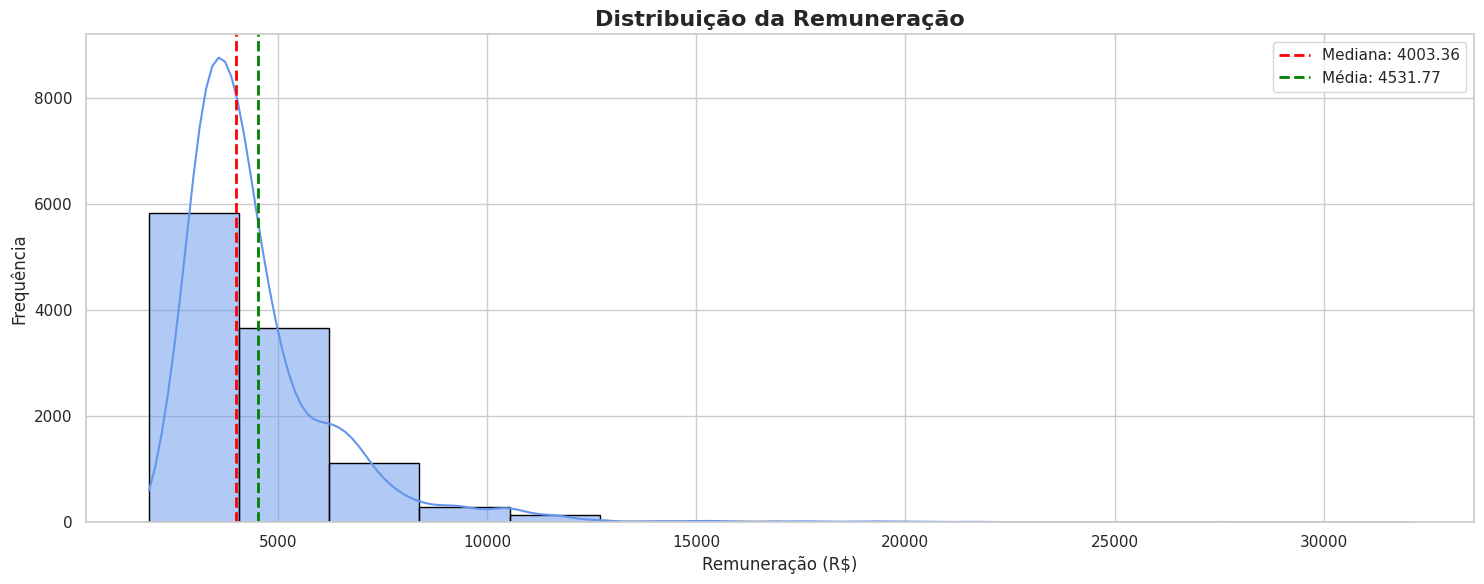

In [50]:
plt.figure(figsize=(15, 6))
sns.histplot(data=faixas, x='remuneracao', bins=int(k), kde=True, color='cornflowerblue', edgecolor='black')

mediana = faixas['remuneracao'].median()
plt.axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')

media = faixas['remuneracao'].mean()
plt.axvline(media, color='green', linestyle='--', linewidth=2, label=f'Média: {media:.2f}')

plt.title('Distribuição da Remuneração', fontsize=16, weight='bold')
plt.xlabel('Remuneração (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

O gráfico tende a ser assimetrico para a nossa esquerda

Identificar faixas salariais e entender se a remuneração das pessoas coordenadores estão dentro dos 99% maiores salários

In [51]:
quartis={
    'Q1':colaboradores['remuneracao'].quantile(0.25),
    'Q2':colaboradores['remuneracao'].quantile(0.5),
    'Q3':colaboradores['remuneracao'].quantile(0.75),
}
quartis

{'Q1': np.float64(3345.0775),
 'Q2': np.float64(4003.3599999999997),
 'Q3': np.float64(5036.1575)}

<ipython-input-52-2bf9a80e8e37>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


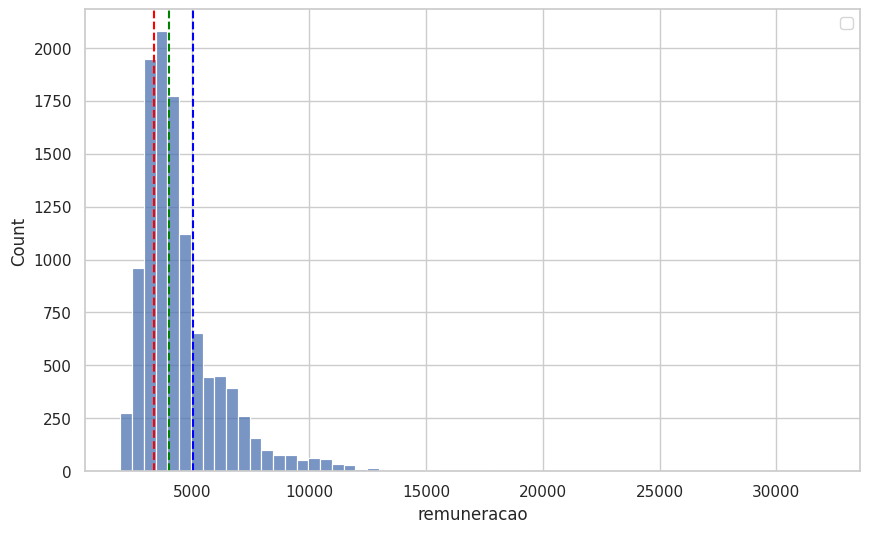

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(binwidth=500,data=colaboradores,x='remuneracao')
plt.axvline(quartis['Q1'],color='red',linestyle="dashed")
plt.axvline(quartis['Q2'],color='green',linestyle="dashed")
plt.axvline(quartis['Q3'],color='blue',linestyle="dashed")
plt.legend()


Temos uma distribuição mais assimétrica da remuneração.
Muitos recebem um valor base e poucos com altos salários

In [53]:
percentil_99=colaboradores['remuneracao'].quantile(0.99)
percentil_99

np.float64(11525.662300000055)

In [54]:
coordenadores=colaboradores[colaboradores['cargo']=='Coordenador(a)']
num_coordenadores=len(coordenadores)
num_coordenadores

45

In [55]:
coordenadores_alta_remuneracao=colaboradores[(colaboradores['cargo']=='Coordenador(a)') & (colaboradores['remuneracao']>percentil_99)]

num_coordenadores_alta_remuneracao=len(coordenadores_alta_remuneracao)
num_coordenadores_alta_remuneracao

45

Confirmando que os colaboradores estão entre os 1% que recebem maiores salários dentro da empresa. Podemos passar essa informação para o RH e financeiro, averiguando se está dentro das politicas salariais

Vamos identificar um os 20% dos colaboradores mais jovens, pois a empresa deseja implementar um curso de desenvolvimento profissional de jovens talentos

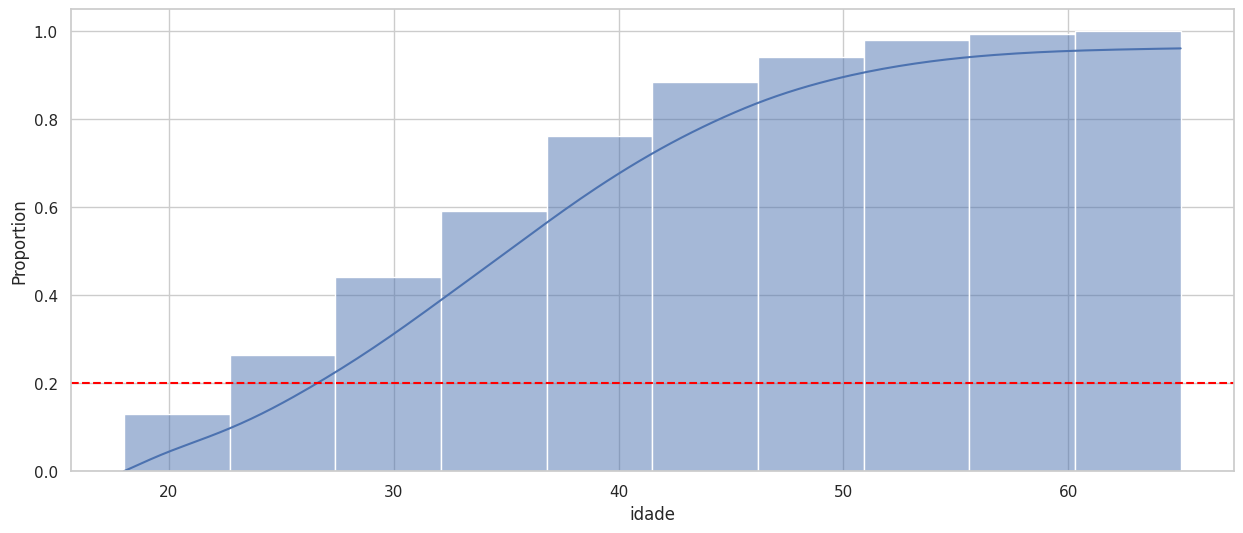

In [56]:
plt.figure(figsize=(15,6))
sns.histplot(data=colaboradores,x='idade',bins=10,cumulative=True,stat='proportion',kde=True)
plt.axhline(0.20,color='red',linestyle='dashed')
plt.show()


In [57]:
classificacao_idade=colaboradores.copy()
classificacao_idade.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55


In [58]:
classificacao_idade=classificacao_idade.sort_values(by='idade')

classificacao_idade['cumulativo']=(classificacao_idade.reset_index().index+1)/len(classificacao_idade)

classificacao_idade['qualificado']=classificacao_idade['cumulativo']<=0.20

classificacao_idade.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,cumulativo,qualificado
3894,EST003895,Maria Fernanda da Cunha,Feminino,18,Estoquista,Excelente,3780.33,0.000090,True
9464,REP009465,Sarah Campos,Feminino,18,Repositor(a),Insuficiente,2892.80,0.000180,True
3928,EST003929,Ana Carolina Cardoso,Feminino,18,Estoquista,Regular,4062.46,0.000271,True
1059,SUP001060,Maria Helena da Paz,Feminino,18,Suporte,Excelente,5216.76,0.000361,True
10544,REP010545,Allana Teixeira,Feminino,18,Repositor(a),Bom,3662.98,0.000451,True


In [59]:
idades_qualificados=classificacao_idade[classificacao_idade['qualificado']==True]
idades_qualificados

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,cumulativo,qualificado
3894,EST003895,Maria Fernanda da Cunha,Feminino,18,Estoquista,Excelente,3780.33,0.000090,True
9464,REP009465,Sarah Campos,Feminino,18,Repositor(a),Insuficiente,2892.80,0.000180,True
3928,EST003929,Ana Carolina Cardoso,Feminino,18,Estoquista,Regular,4062.46,0.000271,True
1059,SUP001060,Maria Helena da Paz,Feminino,18,Suporte,Excelente,5216.76,0.000361,True
10544,REP010545,Allana Teixeira,Feminino,18,Repositor(a),Bom,3662.98,0.000451,True
...,...,...,...,...,...,...,...,...,...
6983,EST006984,Maysa Vasconcelos,Feminino,25,Estoquista,Bom,2725.33,0.199639,True
9787,REP009788,Augusto Jesus,Masculino,25,Repositor(a),Bom,3863.30,0.199729,True
1640,SUP001641,Leonardo Silveira,Masculino,25,Suporte,Excelente,6052.56,0.199820,True
4253,EST004254,João Vitor Cassiano,Masculino,25,Estoquista,Excelente,3677.53,0.199910,True


In [60]:
len(idades_qualificados)

2218

Com base nessa análise, nota-se que há **2.218 pessoas** qualificadas para esse programa, representando os **20% mais jovens do total de  colaboradores**. O grupo pode ser o alvo ideal para o devido programa

Analisando a remuneração dos colaboradores pelo sexo biológico.
Com intuito de buscar garantir a equidade salarial

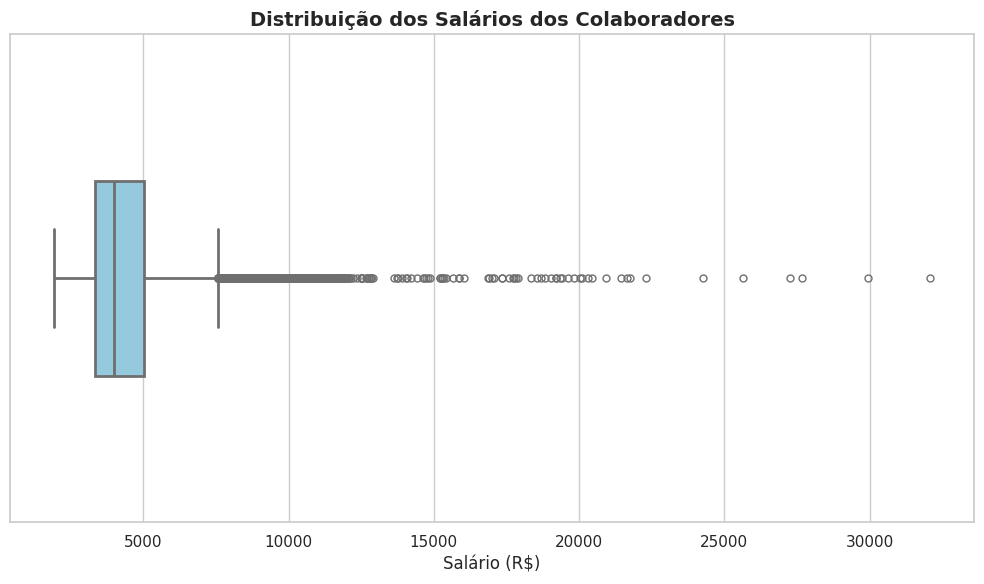

In [61]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.boxplot(
    x=colaboradores['remuneracao'],
    color='skyblue',
    width=0.4,
    fliersize=5,
    linewidth=2
)


plt.title('Distribuição dos Salários dos Colaboradores', fontsize=14, weight='bold')
plt.xlabel('Salário (R$)', fontsize=12)
plt.yticks([])
plt.tight_layout()
plt.show()

In [62]:
colaboradores['remuneracao'].describe()

,remuneracao
count,11090.000000
mean,4531.771665
std,2002.369876
min,1920.570000
25%,3345.077500
50%,4003.360000
75%,5036.157500
max,32084.550000


analisando agora pelo sexo biologico

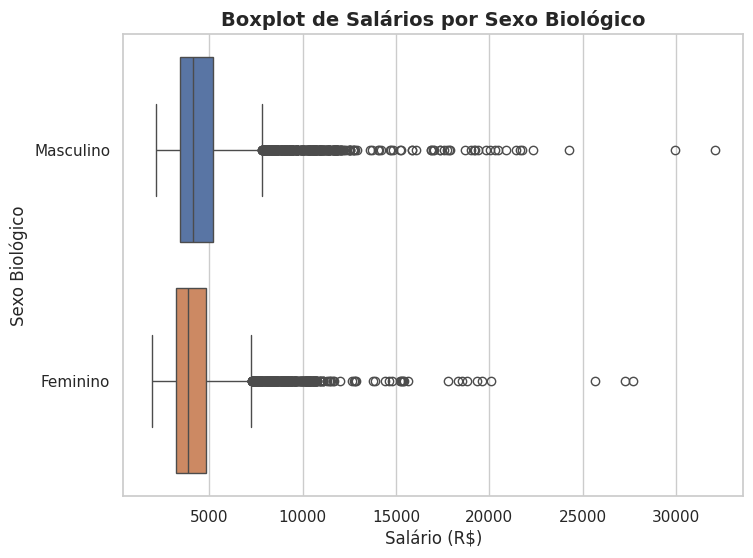

In [63]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(x='remuneracao',y='sexo_biologico',data=colaboradores,hue='sexo_biologico')

plt.title('Boxplot de Salários por Sexo Biológico', fontsize=14, weight='bold')
plt.xlabel('Salário (R$)', fontsize=12)
plt.ylabel('Sexo Biológico', fontsize=12)

plt.show()


Analisando o gráfico notamos que aparentemente as pessoas do sexo masculino possuem uma distribuição salarial maior que do sexo feminino. Porém com os candidatos à outliers não fica clara a diferença

In [64]:
colaboradores_filtrados=colaboradores[colaboradores['remuneracao']<=10e3]
colaboradores_filtrados.head()

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
65,CON000066,Antony da Paz,Masculino,40,Consultor(a) de vendas,Regular,9317.13
66,CON000067,Luiz Felipe Sales,Masculino,38,Consultor(a) de vendas,Regular,9423.72
67,CON000068,Sophia Mendonça,Feminino,37,Consultor(a) de vendas,Regular,9409.15
68,CON000069,Rael Leão,Masculino,40,Consultor(a) de vendas,Bom,9315.77
70,CON000071,Stephany Sales,Feminino,27,Consultor(a) de vendas,Bom,9060.64


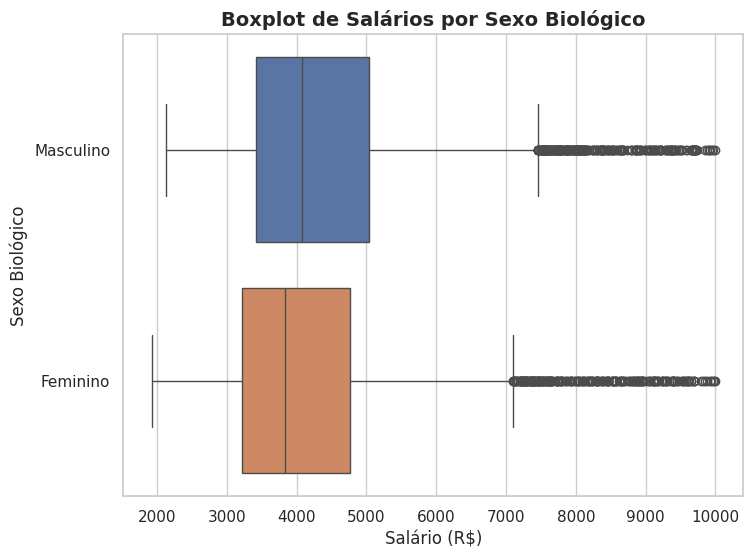

In [65]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(x='remuneracao',y='sexo_biologico',data=colaboradores_filtrados,hue='sexo_biologico')

plt.title('Boxplot de Salários por Sexo Biológico', fontsize=14, weight='bold')
plt.xlabel('Salário (R$)', fontsize=12)
plt.ylabel('Sexo Biológico', fontsize=12)

plt.show()

Nota-se que **a mediana dos sálarios para as pessoas do sexo feminino é menor**, sendo que o feminino é abaixo de **R$4.000,00** e o segundo é acima desse valor

In [66]:
estat_remuneracao=colaboradores.groupby('sexo_biologico')['remuneracao'].agg(
    Q1=lambda x: x.quantile(0.25),
    mediana='median', media='mean',
    Q3= lambda x:x.quantile(0.75),
    IIQ= lambda x: x.quantile(0.75)- x.quantile(0.25)
).reset_index()

estat_remuneracao

,sexo_biologico,Q1,mediana,media,Q3,IIQ
0,Feminino,3219.585,3858.82,4352.968368,4843.315,1623.730
1,Masculino,3427.525,4121.19,4673.053688,5189.190,1761.665


Pode passar esses resultados para o RH da empresa, para assim inveestigar as causas(especialmente para cargos similares). Dessa forma, buscar garantir a igualdade

vamos ver os valores de tendência central dos salários dos cargos de inteligência comercial e Consultor(a) de vendas

In [67]:
comercial=colaboradores[colaboradores['cargo'].isin(['Inteligência comercial','Consultor(a) de vendas'])]
comercial

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
65,CON000066,Antony da Paz,Masculino,40,Consultor(a) de vendas,Regular,9317.13
66,CON000067,Luiz Felipe Sales,Masculino,38,Consultor(a) de vendas,Regular,9423.72
67,CON000068,Sophia Mendonça,Feminino,37,Consultor(a) de vendas,Regular,9409.15
68,CON000069,Rael Leão,Masculino,40,Consultor(a) de vendas,Bom,9315.77
69,CON000070,Helena Cavalcante,Feminino,31,Consultor(a) de vendas,Bom,10223.20
...,...,...,...,...,...,...,...
420,INT000421,Bruna Rocha,Feminino,25,Inteligência comercial,Insuficiente,9394.34
421,INT000422,Sabrina Fonseca,Feminino,25,Inteligência comercial,Insuficiente,8818.74
422,INT000423,Lucas Freitas,Masculino,40,Inteligência comercial,Insuficiente,9304.39
423,INT000424,Samuel Brito,Masculino,40,Inteligência comercial,Regular,10345.32


In [68]:
comercial.groupby('cargo')['remuneracao'].describe()[['mean','50%']]

,mean,50%
cargo,,
Consultor(a) de vendas,10180.454833,10213.43
Inteligência comercial,10200.420000,10217.49


As medidas de tendência central servem para trazer um valor que generaliza nosso dado. Neste caso precisamos utilizar as medidas de dispersão para ter uma noção

In [69]:
np.random.seed(42)
amostra=comercial.sample(n=10)
amostra

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
289,INT000290,Lorena Pinto,Feminino,34,Inteligência comercial,Bom,8427.85
107,CON000108,Olivia Castro,Feminino,25,Consultor(a) de vendas,Bom,10578.73
350,INT000351,Renan Moura,Masculino,25,Inteligência comercial,Excelente,10406.36
367,INT000368,Gabrielly Aparecida,Feminino,27,Inteligência comercial,Excelente,10454.42
121,CON000122,Melissa Pastor,Feminino,25,Consultor(a) de vendas,Bom,10046.53
337,INT000338,Emilly Silva,Feminino,33,Inteligência comercial,Bom,8861.07
80,CON000081,Catarina Porto,Feminino,25,Consultor(a) de vendas,Regular,8646.19
122,CON000123,Antony Ferreira,Masculino,37,Consultor(a) de vendas,Bom,10001.79
313,INT000314,Alexia da Cruz,Feminino,42,Inteligência comercial,Regular,10557.85
189,CON000190,Benicio Machado,Masculino,37,Consultor(a) de vendas,Bom,11354.96


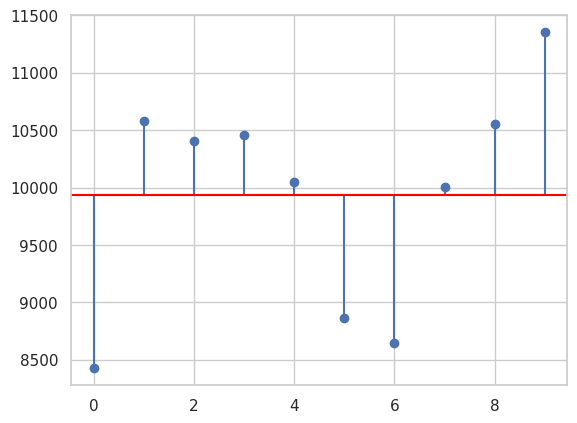

In [70]:
plt.stem(amostra['remuneracao'],bottom=amostra['remuneracao'].mean())
plt.axhline(y=amostra['remuneracao'].mean(),color='red')

plt.show()

In [71]:
estat_colab=comercial.groupby('cargo')['remuneracao'].agg(media='mean',
                                                          mediana='median',
                                                          mad=lambda x: (abs(x-x.mean())).mean()).reset_index()

estat_colab

,cargo,media,mediana,mad
0,Consultor(a) de vendas,10180.454833,10213.43,843.398335
1,Inteligência comercial,10200.420000,10217.49,929.853000


A média e mediana estão próximas entre os dois cargos. E o desvio médio absoluto é ligeiramente maior para as pessoas consultoras, indicando maior dispersão se comparada com as pessoas da Inteligência comercial

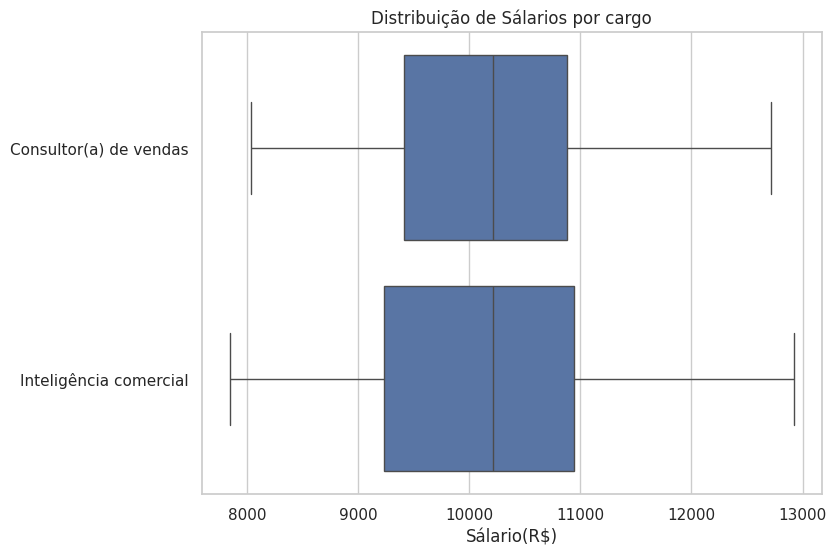

In [72]:
plt.figure(figsize=(8,6))
sns.boxplot(x='remuneracao',y='cargo',data=comercial)

plt.title('Distribuição de Sálarios por cargo')
plt.xlabel('Sálario(R$)')
plt.ylabel('')

plt.show()

Analisando a diferença salarial para cargos operacionais

Vamos ler os valores de tendência central dos salários dos cargos de estoquista e repositor

In [73]:
operacional=colaboradores[colaboradores['cargo'].isin(['Estoquista','Repositor(a)'])]
operacional

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao
2990,EST002991,Fernando da Luz,Masculino,34,Estoquista,Excelente,4547.65
2991,EST002992,Maria Júlia das Neves,Feminino,50,Estoquista,Insuficiente,2558.19
2992,EST002993,Evelyn Vasconcelos,Feminino,18,Estoquista,Insuficiente,2956.15
2993,EST002994,Igor Brito,Masculino,38,Estoquista,Regular,3431.13
2994,EST002995,João Vitor da Paz,Masculino,37,Estoquista,Excelente,3031.93
...,...,...,...,...,...,...,...
11085,REP011086,Nicolas Mendes,Masculino,40,Repositor(a),Bom,3340.72
11086,REP011087,Maria Luísa Câmara,Feminino,48,Repositor(a),Insuficiente,3330.98
11087,REP011088,Allana da Mota,Feminino,28,Repositor(a),Excelente,3382.03
11088,REP011089,Bruno Rezende,Masculino,36,Repositor(a),Bom,3088.46


In [74]:
operacional.groupby('cargo')['remuneracao'].describe()[['mean','50%']]

,mean,50%
cargo,,
Estoquista,3691.291726,3663.560
Repositor(a),3646.120496,3633.075


Notamos que as médias e medianas estão próximas. Vamos utilizar as medidas de dispersão para ter uma noção se realmente temos uma diferença relevantes entre os salários dos dois cargos

In [75]:
estatisticas_operacionais=operacional.groupby('cargo')['remuneracao'].agg(
    media='mean',
    mediana='median',
    variancia='var'
).reset_index()

estatisticas_operacionais


,cargo,media,mediana,variancia
0,Estoquista,3691.291726,3663.560,786009.782487
1,Repositor(a),3646.120496,3633.075,228556.384730


Utilizamos o desvio padrão para facilitar a forma que representamos os resultados

In [76]:
estatisticas_operacionais=operacional.groupby('cargo')['remuneracao'].agg(
    media='mean',
    mediana='median',
    variancia='var',
    desvio_padrao='std',
    mad=lambda x: (abs(x-x.mean())).mean()
).reset_index()

estatisticas_operacionais

,cargo,media,mediana,variancia,desvio_padrao,mad
0,Estoquista,3691.291726,3663.560,786009.782487,886.571927,754.656332
1,Repositor(a),3646.120496,3633.075,228556.384730,478.075710,399.522975


*   Média e mediana tem valores bem próximos, indicando uma simetria na centralidade.
*   Variância e desvio padrão: O cargo de estoquista tem maior variância e desvio padrão, revelando maior dispersão nos salários.
*   MAD vs Desvio Padrão: Em ambos os casos o MAD é menor em relação ao desvio padrão, indicando que a dispersão está sendo influenciada por valores mais extremos



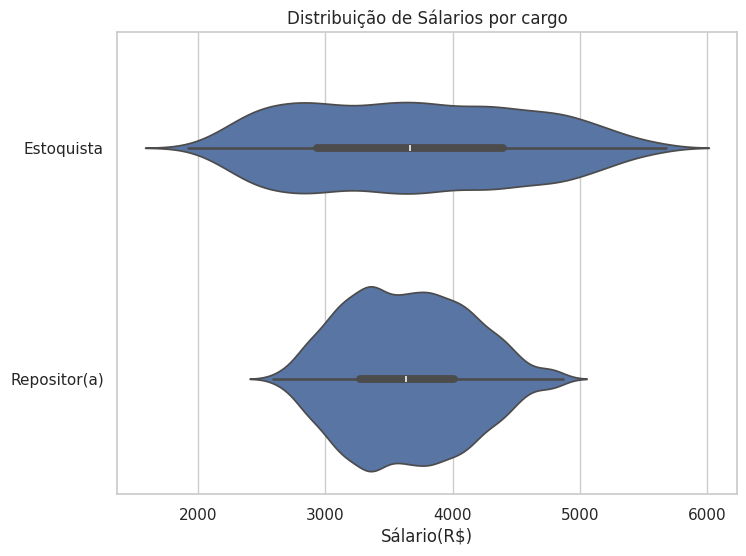

In [77]:
plt.figure(figsize=(8,6))
sns.violinplot(x='remuneracao',y='cargo',data=operacional)

plt.title('Distribuição de Sálarios por cargo')
plt.xlabel('Sálario(R$)')
plt.ylabel('')

plt.show()

Ambos cargos tem a média e mediana salarial bem próxima, porém há uma dispersão considerável entre os sálarios, que foi comprovada pelo MAD e desvio padrão quanto observando o intervalo interquartil(IIQ) no gráfico



*   Cargo de estoquista tem maior variabilidade salarial
*   RH deve avaliar se essa inconsistência reflete em uma discrepância injusta ou se há justificativa baseadas em experiência ou meritocracia

